# Exercise 7: Support Vector Machines
In this exercise, we will explore SVM kernels and study the effect of the hyperparameters on a toy dataset. 

In [1]:
# Required libraries
import matplotlib.pyplot as plt
import seaborn as sns       
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn import svm

### **Data**
 

In the assignment .zip file, you can find a .csv file called toy_dataset.csv.

In [2]:
### ToDo
## Import the data
data = pd.read_csv('data/toy_dataset.csv')

## Visualize the data to explore it
data.describe()

,x1,x2,y
count,300.000000,300.000000,300.000000
mean,0.012417,-0.001496,0.500000
std,0.663466,0.683014,0.500835
min,-1.521490,-1.887818,0.000000
25%,-0.496269,-0.549658,0.000000
50%,0.047998,0.029793,0.500000
75%,0.509180,0.493624,1.000000
max,1.511570,1.631279,1.000000


In [3]:
data.head()

,x1,x2,y
0,-0.397537,0.123492,1.0
1,0.388624,1.417034,0.0
2,0.493635,-0.502826,1.0
3,-0.266391,-0.631363,1.0
4,-1.478465,0.137630,0.0


<AxesSubplot:xlabel='x1', ylabel='x2'>

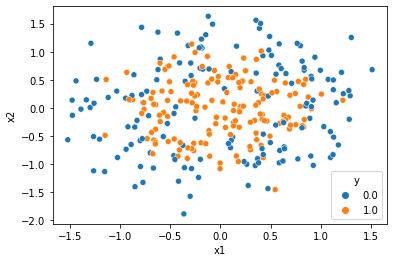

In [4]:
sns.scatterplot(x=data.x1, y=data.x2, hue=data.y)

In [5]:
X = data.drop('y', axis=1).values
y = data['y']

In [7]:
## Helper function to plot the decision boundary of a classifier. 
def plot_decision_svm(X, y, clf, kernel_name = 'Linear'):

  # X -- The data points
  # y -- The labels
  # clf -- The classifier
  # Kernel_name -- name of the kernel: string Linear, poly, RBF
  ax = plt.subplot(1, 1, 1)
  h = 0.05 # step size
  x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
  y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
  # Plot the decision boundary. For that, we will assign a color to each
  # point in the mesh [x_min, x_max]x[y_min, y_max].
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

  # Plot the points
  ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr,
              edgecolors='k')

  ax.set_xlim(xx.min(), xx.max())
  ax.set_ylim(yy.min(), yy.max())
  #ax.set_xticks(())
  #ax.set_yticks(())

  ax.set_title(kernel_name)
  plt.tight_layout()
  plt.show()

In [8]:
# Helper function to visualize the results of a grid search with the two hyperparameters of rbf kernel as a heatmap
def heatmap(grid):
    """
    grid --  GridSearchCV instance  
    """
    pvt = pd.pivot_table(pd.DataFrame(grid.cv_results_),
        values='mean_test_score', index='param_C', columns='param_gamma')
    ax = sns.heatmap(pvt, annot=True)
    ax.invert_yaxis()

### Compare SVM Kernels
 


*   Fit  SVM  with  linear,  polynomial  and  RBF  kernels  with  default parameter values


*   Plot the decision boundary for each kernel with the helper function.

*   Interpret the plots and compare the behavior of the three kernels.

In [9]:
##ToDo
#Fit different kernels 

linear_svm = svm.SVC(kernel='linear')
poly_svm = svm.SVC(kernel='poly')
rbf_svm = svm.SVC(kernel='rbf')

linear_svm = linear_svm.fit(X,y)
poly_svm = poly_svm.fit(X,y)
rbf_svm = rbf_svm.fit(X,y)

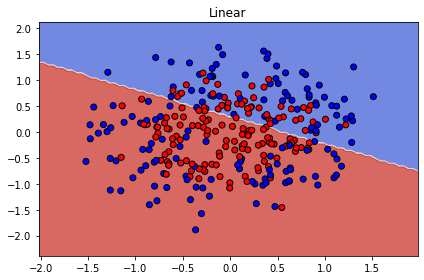

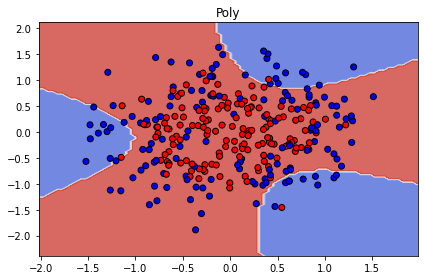

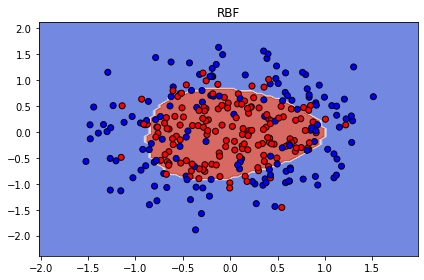

In [10]:
#Plot the decision boundary
plot_decision_svm(X, y, linear_svm, 'Linear')
plot_decision_svm(X, y, poly_svm, 'Poly')
plot_decision_svm(X, y, rbf_svm, 'RBF')

### Optimize rbf Kernel
 

* Create a grid with the following values: {
         
                        'gamma': [1e-4, 1e-3, 1e-2, 1e-1, 1, 2],
                        
                         'C': [1e-2, 1e-1, 1, 2, 5, 10]}
* Use GridSearchCV with SVC(kernel='rbf') as classifier, and 3-fold-cross-validation(cv). 


In [11]:
##ToDo
rbf_svm = svm.SVC(kernel='rbf')
params = {'gamma': [1e-4, 1e-3, 1e-2, 1e-1, 1, 2], 'C': [1e-2, 1e-1, 1, 2, 5, 10]}
clf = GridSearchCV(rbf_svm, params, cv=3, return_train_score=True)
clf = clf.fit(X, y)

*   Plot a heatmap of the results using the provided helper function.

*   Interpret the heatmap. Analyze the effect of different values of hyperparameters. Does any combination of C and $\gamma$ leads to underfitting or overfitting?
*    Report the accuracy of the best model you get. State the hyperparameters used.

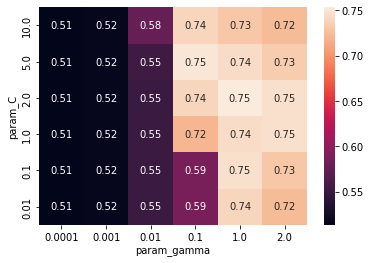

In [12]:
heatmap(clf)

In [13]:
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.002835,0.000259,0.001560,0.000047,0.01,0.0001,"{'C': 0.01, 'gamma': 0.0001}",0.50,0.56,0.48,0.513333,3.399346e-02,31,0.500,0.560,0.550,0.536667,0.026247
1,0.002766,0.000435,0.001604,0.000129,0.01,0.001,"{'C': 0.01, 'gamma': 0.001}",0.51,0.56,0.48,0.516667,3.299832e-02,25,0.500,0.565,0.555,0.540000,0.028577
2,0.002427,0.000028,0.001533,0.000064,0.01,0.01,"{'C': 0.01, 'gamma': 0.01}",0.60,0.54,0.51,0.550000,3.741657e-02,21,0.545,0.625,0.570,0.580000,0.033417
3,0.002252,0.000186,0.001415,0.000088,0.01,0.1,"{'C': 0.01, 'gamma': 0.1}",0.60,0.56,0.60,0.586667,1.885618e-02,17,0.655,0.660,0.620,0.645000,0.017795
4,0.002256,0.000038,0.001391,0.000059,0.01,1,"{'C': 0.01, 'gamma': 1}",0.82,0.63,0.77,0.740000,8.041559e-02,8,0.720,0.795,0.790,0.768333,0.034238
5,0.002189,0.000015,0.001344,0.000032,0.01,2,"{'C': 0.01, 'gamma': 2}",0.80,0.64,0.73,0.723333,6.548961e-02,14,0.695,0.765,0.740,0.733333,0.028964
6,0.002218,0.000060,0.001349,0.000030,0.1,0.0001,"{'C': 0.1, 'gamma': 0.0001}",0.50,0.56,0.48,0.513333,3.399346e-02,31,0.500,0.560,0.550,0.536667,0.026247
7,0.002145,0.000026,0.001335,0.000026,0.1,0.001,"{'C': 0.1, 'gamma': 0.001}",0.51,0.56,0.48,0.516667,3.299832e-02,25,0.500,0.565,0.555,0.540000,0.028577
8,0.002468,0.000134,0.001606,0.000114,0.1,0.01,"{'C': 0.1, 'gamma': 0.01}",0.60,0.54,0.51,0.550000,3.741657e-02,21,0.545,0.625,0.570,0.580000,0.033417
9,0.004301,0.000540,0.002129,0.000790,0.1,0.1,"{'C': 0.1, 'gamma': 0.1}",0.60,0.56,0.60,0.586667,1.885618e-02,17,0.655,0.660,0.620,0.645000,0.017795


In [14]:
print(f'Test accuracy of best model: {clf.best_score_}')
print(f'Hyperparameters with best mean test accuracy: {clf.best_params_}')

Test accuracy of best model: 0.7533333333333334
Hyperparameters with best mean test accuracy: {'C': 2, 'gamma': 1}


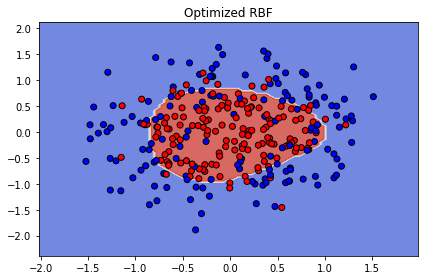

In [16]:
##ToDo
#Plot headmap of the result
plot_decision_svm(X, y, clf, 'Optimized RBF')

# Interpretations for Question 7
### A:

For the linear classifier, the decision boundary does not fit the patterns visible in the given data because the data is not linearly separable. For both the red and the blue dots, a large amount of their respective points are not classified correctly.

The polynomial classifier is also not very good. We can see that it is trying to distinguish the data points in the center as red. But the blue data points are also included in the red-class areas. The data does not fit the form of a polynomial function, and so a polynomial classifier does not approach the true function that generated this dataset well.

The RBF classifier appears to fit the data quite well, and the shape given when plotting the resulting classifier seems to fit with the circular patterns we detect when looking at the data ourselves. This classifier also appears to be (close to) optimal, as it classifies most points correctly and most points that are misclassified are surrounded by points of the other type.

### B:

The different combinations of C and $\gamma$ can lead to different test accuracy. We find that a low $\gamma$ value always causes the accuracy of the model to become significantly worse, whereas the value of C, other than for a specific combinations of C and $\gamma$, does not seem to influence the accuracy by a large margin. To be more specific, when $\gamma$ is lower than 0.01 (including 0.01), the test accuracy is under 0.6. When the $\gamma$ is equal or larger than 0.1, the test accuracy will be higher when the parameter C is larger or equal to 1.0. When $\gamma$ is larger than or equal to 1.0, the accuracy will be decent. We thus conclude that a large $\gamma$ would be recommended, with preferably a corresponding value of C of ~1.5.

We struggled to draw clear conclusions regarding under- or overfitting from only the heatmap, given that we need both train and test accuracy scores or the variances to determine this. Thus, we used both the heatmap and the train accuracy of each model in the GridSearchCV. When comparing the train and the test accuracy for different configurations, we saw no large differences in either direction that could not be explained by differences between different train-test splits for different cross-validation runs. We conclude from this there is no clear underfitting or overfitting.

Test accuracy of best model: 0.7533

Hyperparameters with best mean test accuracy: {'C': 2, 'gamma': 1}